# Preparation

In [1]:
import os 
os.chdir("/home/jovyan/work")

# Control Task 2.1
Sample from the given GMM and plot the values as histogram,

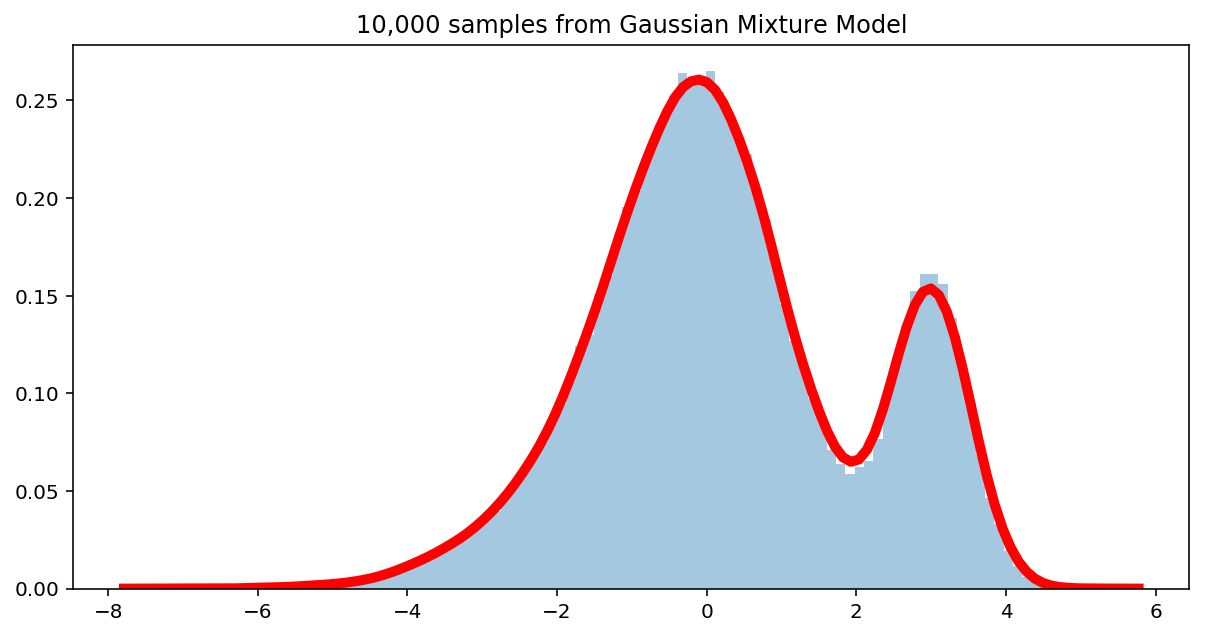

In [2]:
# %load src/2-01-gmm-samples.py
# Imports
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Config
os.chdir("/home/jovyan/work")
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 5)

# Prepare Distributions
mus = [-1, 0, 3]
sigs = [1.5, 1, 0.5]
pis = [0.3, 0.5, 0.2]
N = []
for mu, sig in zip(mus, sigs):
    N.append(norm(loc=mu, scale=sig))

# Sample
n_samples = 100000
samples = np.empty(0)
for pi, n in zip(pis, N):
    samples = np.concatenate((samples, n.rvs(int(n_samples*pi))))

# Evaluation
sns.distplot(
    samples, 
    bins=100, 
    kde_kws={"color":"red", "linewidth":5})
plt.title("10,000 samples from Gaussian Mixture Model")
plt.savefig("./results/2-01-gmm-sample.png")

# Control Task 2.2: AlbSig Housing Prices 
Create a GMM for given housing prices in Albstadt-Sigmaringen.

In [3]:
# %load src/2-02-0-appartments.py
# Import
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns

# Config
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 5)

# Prepare the Distributions
mus = np.arange(500, 1500, 250)
sigs = np.array([70, 90, 120, 150]) # given
N = []
for mu, sig in zip(mus, sigs):
    N.append(norm(loc=mu, scale=sig))

### Plot the Single Distributions

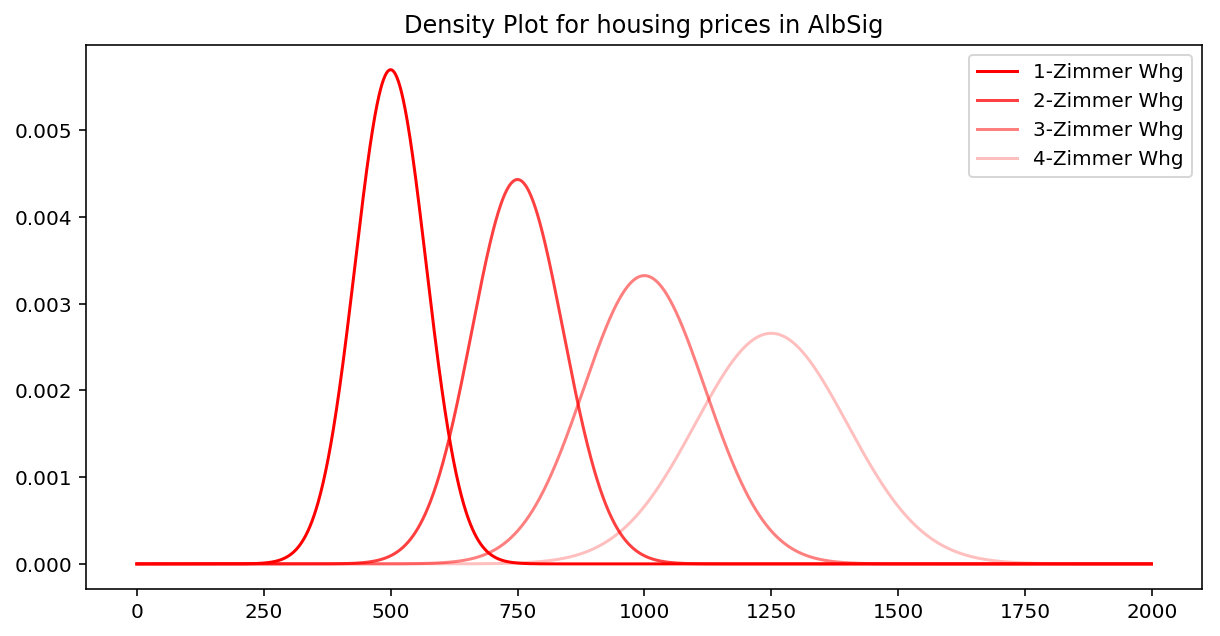

In [4]:
# %load src/2-02-1-appartments-single-distributions.py
x = np.arange(2000)
for idx, n in enumerate(N):
    plt.plot(x, n.pdf(x), color="red", alpha=1-idx*0.25)
plt.legend(["{}-Zimmer Whg".format(i) for i in range(1, 5)])
plt.title("Density Plot for housing prices in AlbSig")
plt.savefig("./results/2-02-1-single-distributions.png")

### Plot GMM

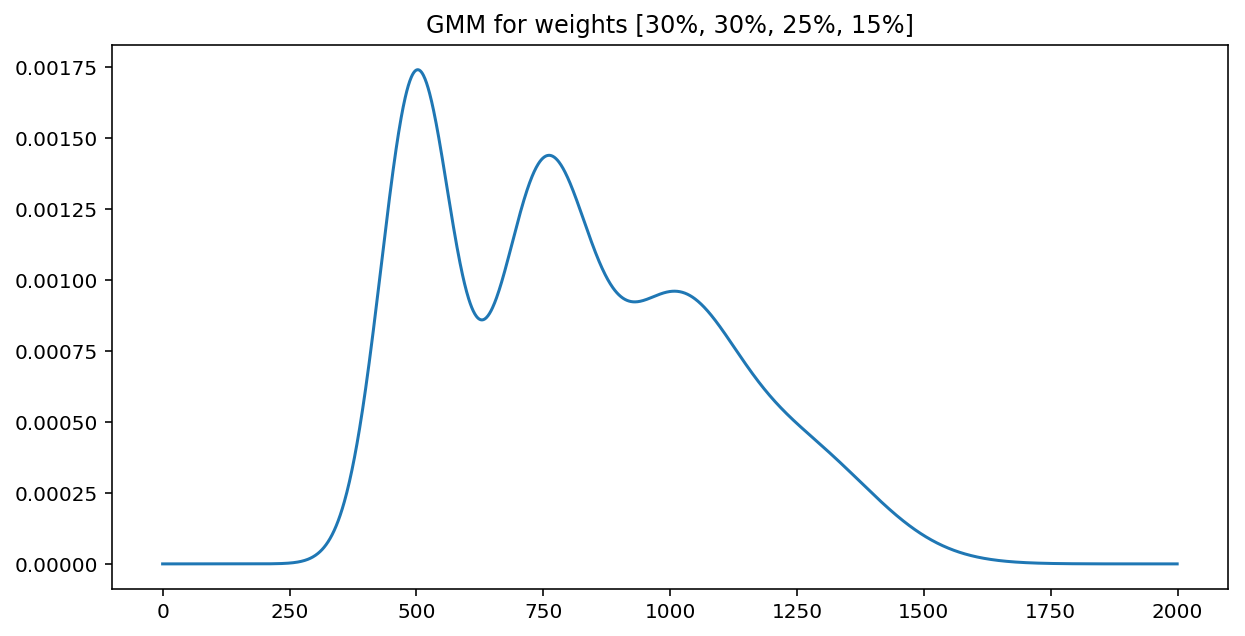

In [5]:
# %load src/2-02-3-appartments-gmm.py
# Prepare the mixture
pis = [.3, .3, .25, .15]
PDF = np.zeros_like(x, dtype="float64")
for pi, n in zip(pis, N):
    PDF += pi * n.pdf(x)

# Evaluate
plt.plot(x, PDF)
plt.title("GMM for weights [30%, 30%, 25%, 15%]")
plt.savefig("./results/2-02-2-mixed-distributions.png")

### Sample from GMM

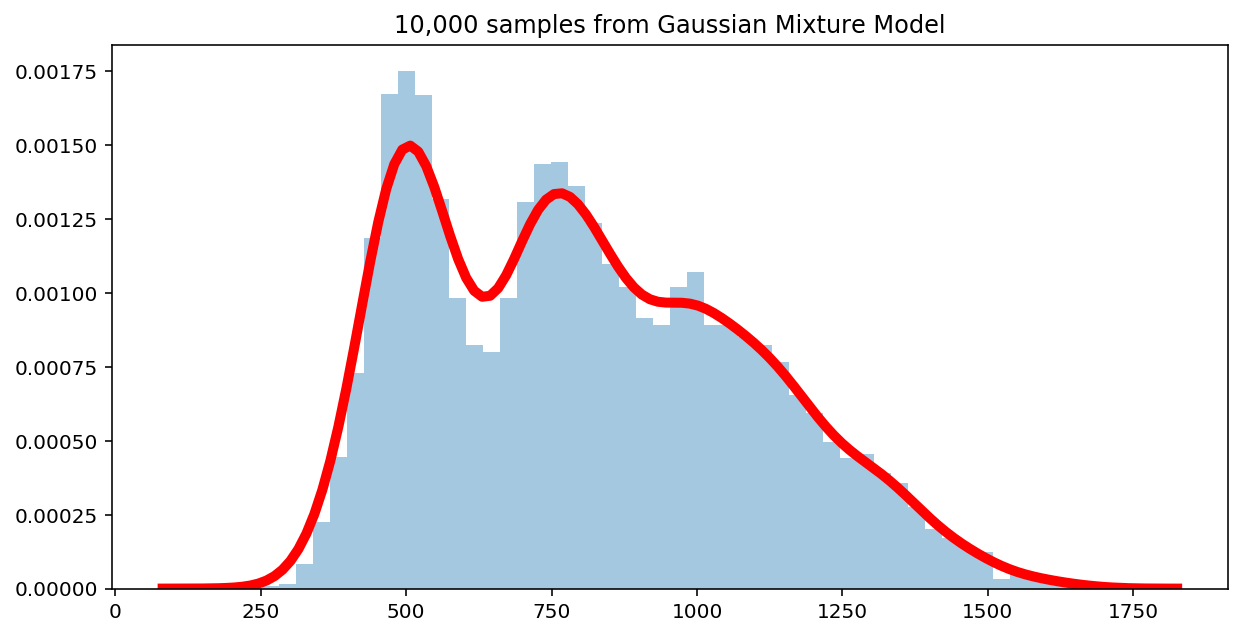

In [6]:
# %load src/2-02-4-appartments-sampling.py
# Sample
n_samples = 10000
samples = np.empty(0)
for pi, n in zip(pis, N):
    samples = np.concatenate((samples, n.rvs(int(pi*n_samples))))

# Evaluate
sns.distplot(
    samples, 
    bins=50, 
    kde_kws={"color":"red", "linewidth":5})
plt.title("10,000 samples from Gaussian Mixture Model")
plt.savefig("./results/2-02-3-sample-with-mixed-distribution.png")

### Probabilities

In [7]:
# %load src/2-02-5-apparments-probabilities.py
# 1-zimmer whg, preis < 300
print("1-room apt: {}".format(norm.cdf(x=300, loc=500, scale=70)))

# 2-zimmer whg, preis < 300
print("2-room apt: {}".format(norm.cdf(x=300, loc=750, scale=90)))

# x-zimmer whg, preis > 700
CDF = 0.0
for pi, n in zip(pis, N):
    CDF += pi * n.cdf(700)
print("X-room apt: {}".format(1-CDF))

1-room apt: 0.0021373669800862794
2-room apt: 2.866515718791933e-07
X-room apt: 0.6122931555778954


# Control Task 2.3: Multivariate Mixture Models
Sample from a multivariate Gaussian Mixture Model

/opt/conda/lib/python3.6/site-packages/scipy/stats/_multivariate.py:651: RuntimeWarning: covariance is not positive-semidefinite.
  out = random_state.multivariate_normal(mean, cov, size)


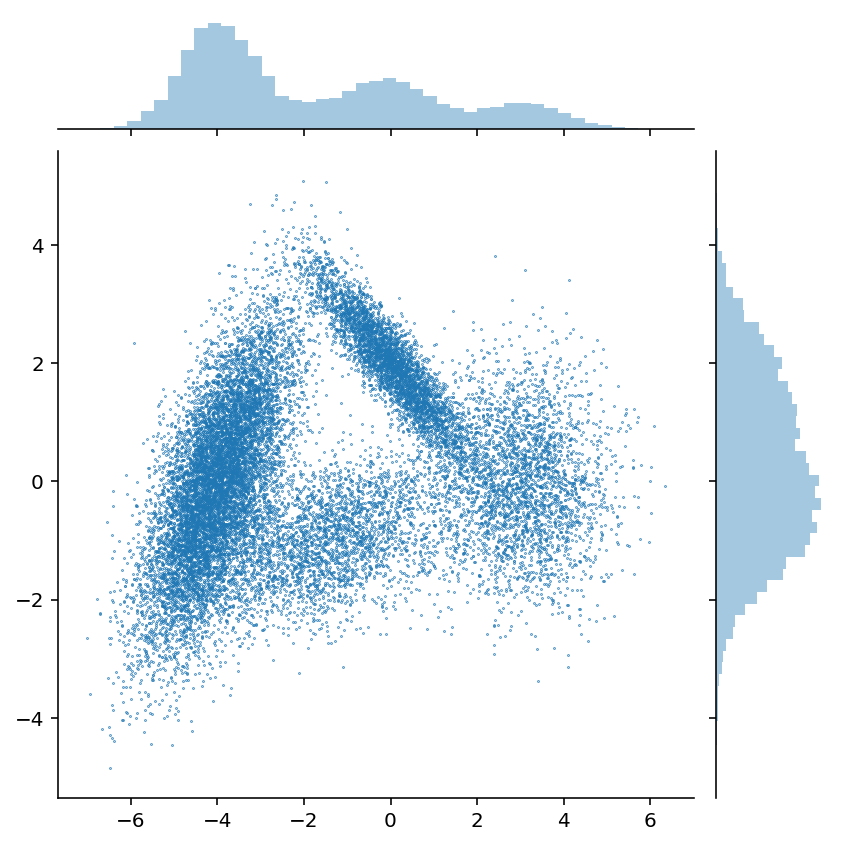

In [8]:
# %load src/2-03-multivariable-gmm.py
# Import
import numpy as np
from scipy.stats import multivariate_normal
import seaborn as sns

# Config
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 5)

# Prepare Distributions
mus = [[-1.5, -1.0], [0.0, 2.0], [-4.0, 0.0], [3.0, 0.0]]
sigs = [
    [[2.0, .4], [.4, .5]],
    [[1.0, -.9], [0, .1]],
    [[.5, .3], [.9, 2.0]],
    [[1.0, .0], [.0, 1.0]],
]
pis = [.15, .2, .5, .15]
N = []
for mu, sig in zip(mus, sigs):
    N.append(multivariate_normal(mean=mu, cov=sig))

# Sample
n_samples = 20000
samples = np.concatenate(
    [n.rvs(int(n_samples * pi)) 
     for pi, n 
     in zip(pis, N)])

# Evaluate
g = sns.jointplot(samples.T[0], samples.T[1], s=.1)
g.ax_joint.legend_.remove()
plt.savefig("./results/2-03-multivariable-gmm.png")

# Control Task 2.4: `zip`
Use `zip` instead of `numpy.array`

In [9]:
# %load src/2-04-zip-usage.py
# Import
import numpy as np

# prepare meshgrid
xx, yy = np.meshgrid(np.linspace(0, 5, 5), np.linspace(0, 5, 5))

# create numpy and zip array
numpy_usage = np.array([xx.ravel(), yy.ravel()]).T # only numpy usage
zip_usage = list(zip(xx.ravel(), yy.ravel())) # classical 'zip' usage

# compare
print(np.array_equal(np.array(zip_usage), numpy_usage))

True


# Control Task 2.5: dimensions
Check the shapes of the arrays

In [10]:
# %load src/2-05-dimensions.py
# Import
import numpy as np

# Build Datasets
x = y = np.linspace(-4.5, 1.5, 200)
X, Y = np.meshgrid(x, y)

# Shape of X and Y
# ==> (200, 200)
print(X.shape)

# Shape of X.ravel(), shape of X.ravel().T
# ==> (40000, )
print(X.ravel().shape)
print(X.ravel().T.shape)

# Shape of np.array([X.ravel(), Y.ravel()]).T
# ==> (40000, 2)
print(np.array([X.ravel(), Y.ravel().T]).T.shape)

# How to "square" the range np.arange(0, 25)
print(np.arange(0, 25).reshape(-1, 5).shape)

(200, 200)
(40000,)
(40000,)
(40000, 2)
(5, 5)


# Control Task 2.6: Contour Plot
Plot the distributions from control task 2.3

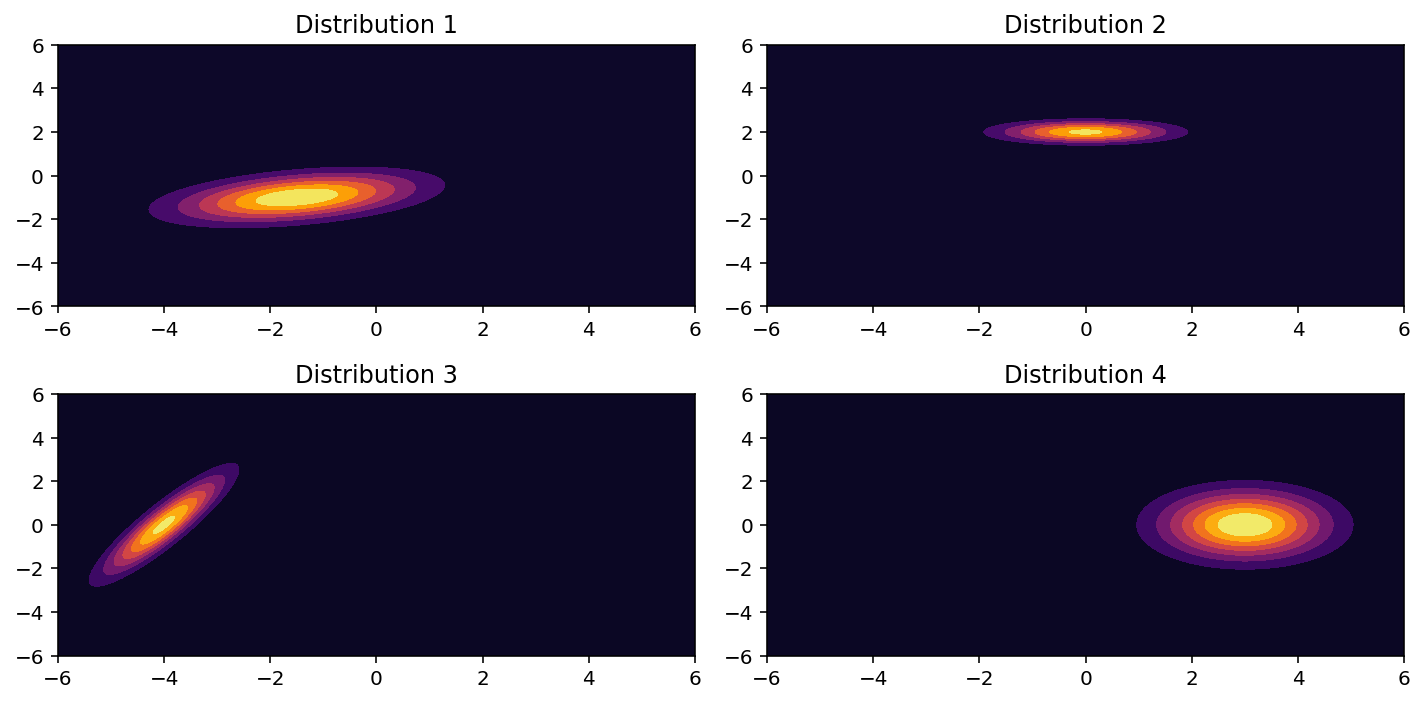

In [11]:
# %load src/2-06-1-single-dist.py
# Import
import numpy as np
from scipy.stats import multivariate_normal
import seaborn as sns

# Config
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 5)

# Prepare Distributions
mus = [[-1.5, -1.0], [0.0, 2.0], [-4.0, 0.0], [3.0, 0.0]]
sigs = [
    [[2.0, .4], [.4, .5]],
    [[1.0, -.9], [0, .1]],
    [[.5, .3], [.9, 2.0]],
    [[1.0, .0], [.0, 1.0]],
]
pis = [.15, .2, .5, .15]
N = []
for mu, sig in zip(mus, sigs):
    N.append(multivariate_normal(mean=mu, cov=sig))

# Plot
xx, yy = np.meshgrid(np.linspace(-6, 6, 300), np.linspace(-6, 6, 300))
fig, axes = plt.subplots(nrows=2, ncols=2)
for idx, (n, ax) in enumerate(zip(N, axes.ravel()), 1):
    zz = n.pdf(np.array([xx.ravel(), yy.ravel()]).T).reshape(xx.shape)
    ax.contourf(xx, yy, zz, cmap="inferno")  
    ax.set_title("Distribution {}".format(idx))
plt.tight_layout()
plt.savefig("./results/2-06-contour-single-dist.png")

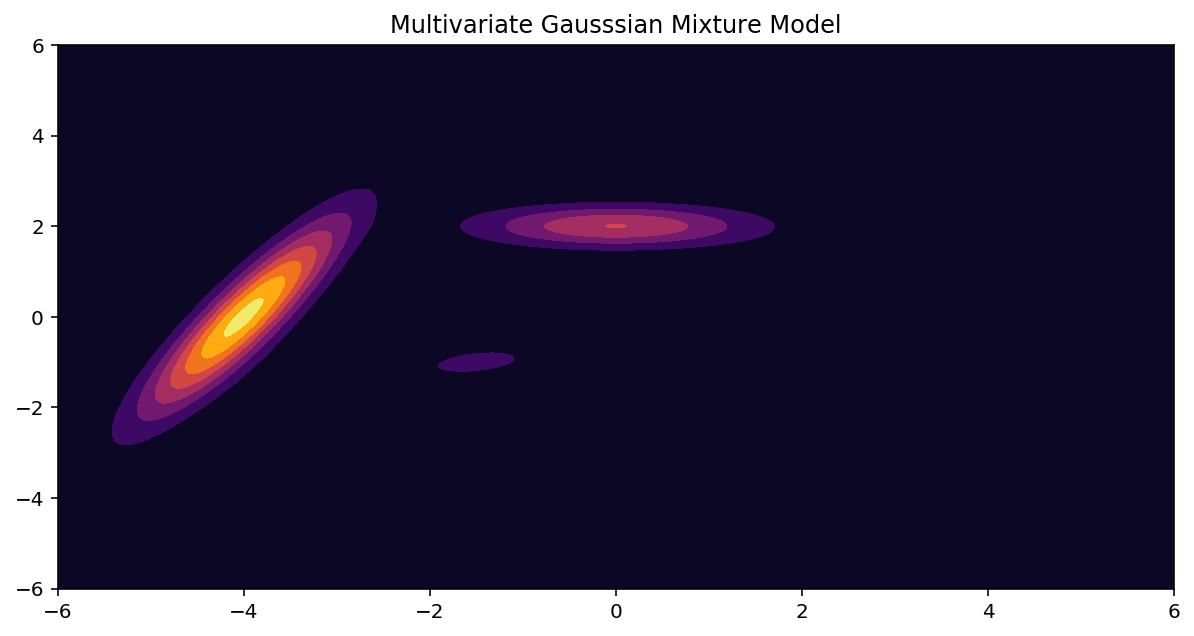

In [12]:
# %load src/2-06-2-multi-dist.py
zz = np.zeros_like(xx)
for pi, n in zip(pis, N):
    zz += pi * n.pdf(np.array([xx.ravel(), yy.ravel()]).T).reshape(xx.shape)
plt.contourf(xx, yy, zz, cmap="inferno")
plt.title("Multivariate Gausssian Mixture Model")
plt.savefig("./results/2-06-contour-multi-dist.png")

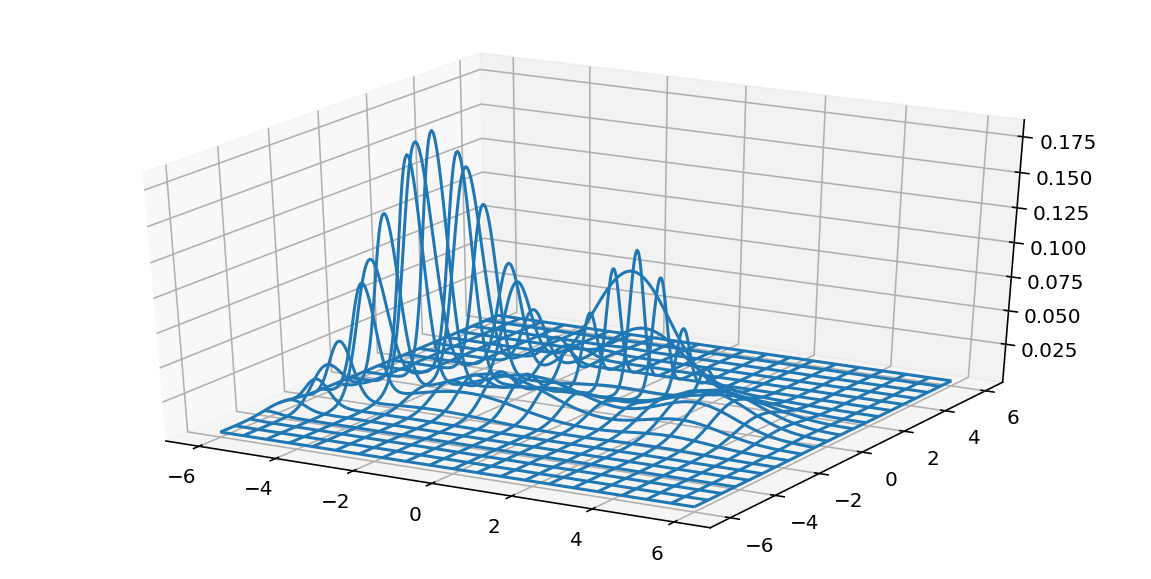

In [13]:
# %load src/2-06-3-3d-multi-dist.py
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(xx, yy, zz, rcount=20, ccount=20)
plt.savefig("./results/2-06-3d-multi-dist.png")

# Control Task 2.7: Hard Clustering
Cluster the data from task 2.3 via k-means (k=4)

/opt/conda/lib/python3.6/site-packages/scipy/stats/_multivariate.py:651: RuntimeWarning: covariance is not positive-semidefinite.
  out = random_state.multivariate_normal(mean, cov, size)


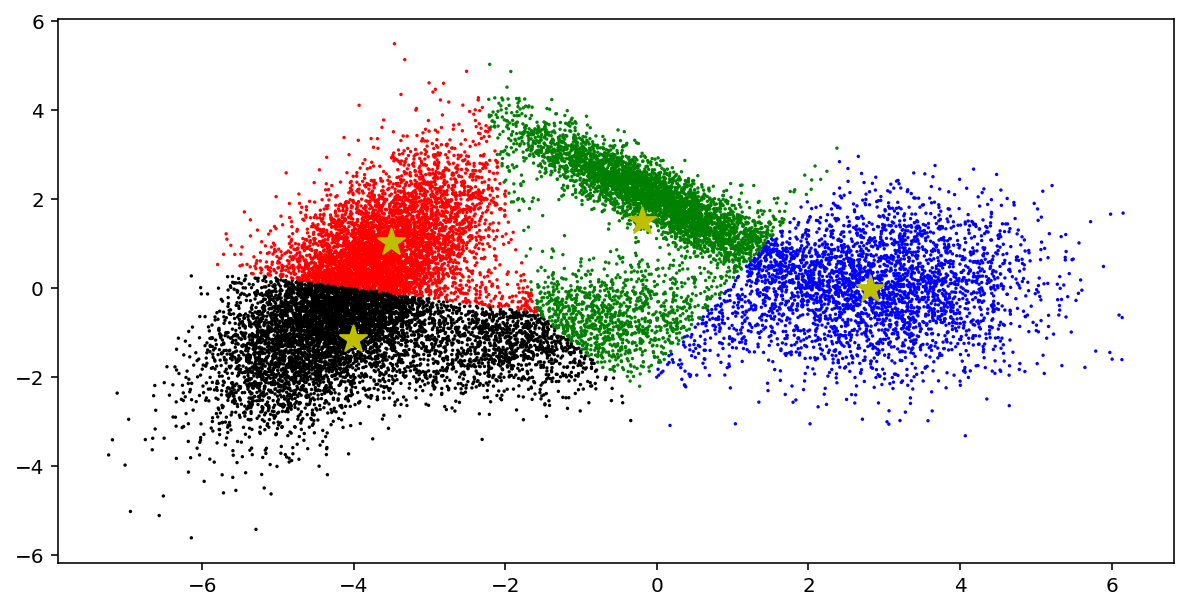

In [14]:
# Import
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.cluster import KMeans

# Config
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 5)

# Prepare Distributions
mus = [[-1.5, -1.0], [0.0, 2.0], [-4.0, 0.0], [3.0, 0.0]]
sigs = [
    [[2.0, .4], [.4, .5]],
    [[1.0, -.9], [0, .1]],
    [[.5, .3], [.9, 2.0]],
    [[1.0, .0], [.0, 1.0]],
]
pis = [.15, .2, .5, .15]
N = []
for mu, sig in zip(mus, sigs):
    N.append(multivariate_normal(mean=mu, cov=sig))

# Sample
n_samples = 20000
samples = np.concatenate(
    [n.rvs(int(n_samples * pi)) 
     for pi, n 
     in zip(pis, N)])

# Clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(samples)

# Plotting
LiCmap = ListedColormap(["r", "b", "g", "k"])
plt.scatter(*samples.T, s=0.5, c=kmeans.labels_, cmap=LiCmap)
plt.scatter(*kmeans.cluster_centers_.T, marker="*", s=200, color="y")
plt.savefig("./results/2-07-hard-clustring.png")

# Control Task 2.8: Two Gauss Sampling
Sample from two Gaussians and plot the samples

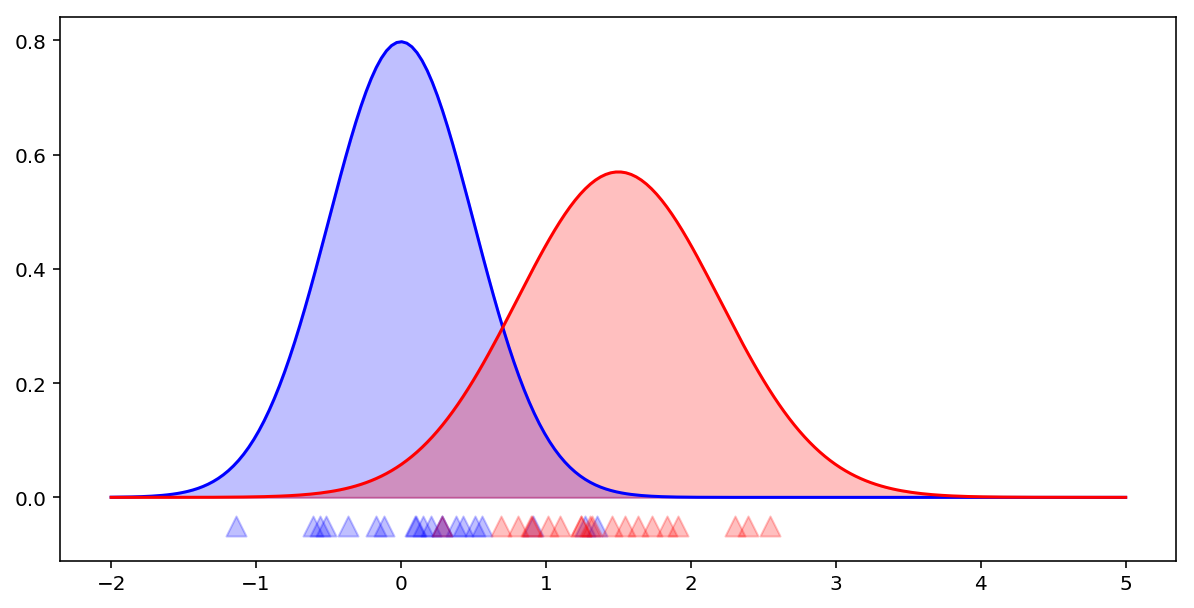

In [47]:
# %load src/2-08-sample-wiht-dist.py
# Import
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Config
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 5)

# Prepare distributions
N = [norm(loc=0, scale=0.5), norm(loc=1.5, scale=0.7)]
x = np.linspace(-2, 5, 200)

# Plot
cmap = ["b", "r"]
n_samples = 20
for n, c in zip(N, cmap):
    plt.plot(x, n.pdf(x), color=c)
    plt.fill_between(x, 0, n.pdf(x), alpha=0.25, color=c)
    plt.scatter(
        n.rvs(n_samples), 
        -.05*np.ones(n_samples), 
        marker="^",
        color=c,
        alpha=.25,
        s=100
    )
plt.savefig("./results/2-08-sample-with-dist.png")

# Control Task 2.9: EM Algorithm
Plot the intermediate step for the EM algorithm

P(a=1|3) ~ 0.00008
P(b=1|3) ~ 0.03470
P(c=1|3) ~ 0.96522


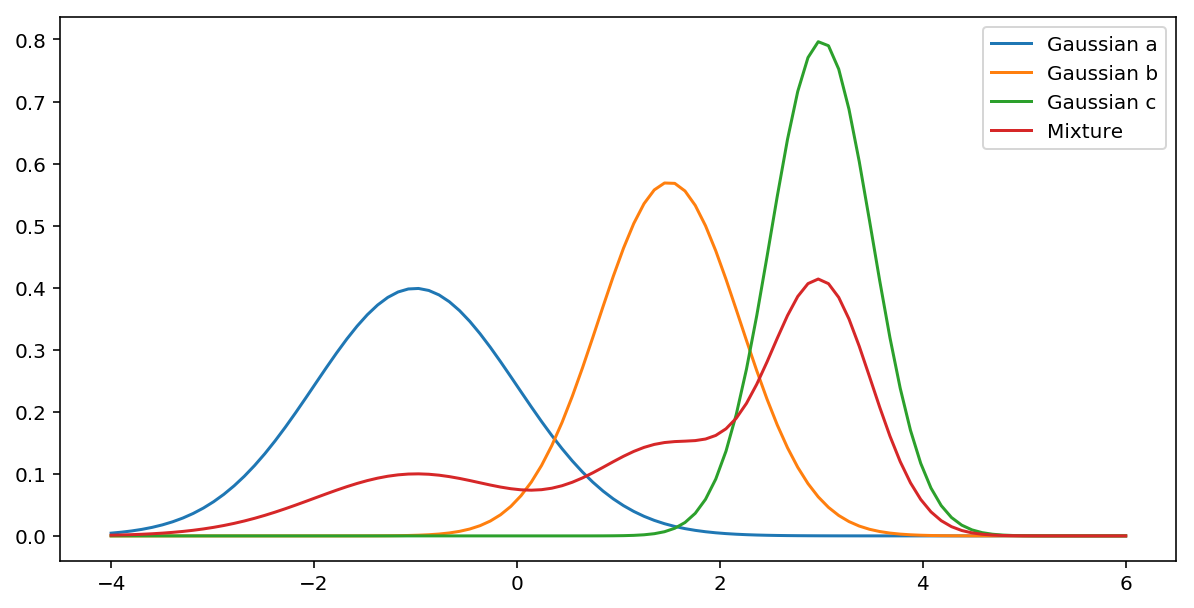

In [91]:
%load src/2